# Setup

## Install

In [1]:
!pip install -U langchain langchain-community langchain-core langgraph langchain-openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.4/415.4 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.5/131.5 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 1.7 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.40
    Uninstalling langchain-core-0.3.40:
      Successfully uninstalled langchain-core-0.3.40
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.19
    Uninstalling langchain-0.3.19:
      Successfully uninstalled langchain-0.3.19


## OpenAI Key 등록
- [OpenAI Key 발급방법](https://platform.openai.com/api-keys)
- [OpenAI 요금](https://openai.com/api/pricing/)

In [ ]:
import os

os.environ['OPENAI_API_KEY'] = 'sk-'


## LLM

In [3]:
from langchain_openai import ChatOpenAI

model = ChatOpenAI(model="gpt-4o-mini")

# [Add memory to chatbots](https://python.langchain.com/docs/how_to/chatbots_memory/)

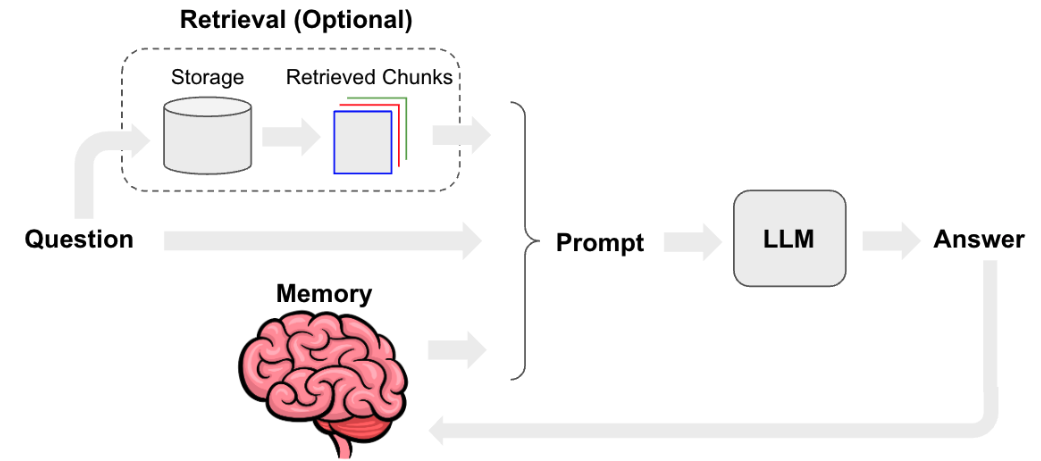

## [Message passing](https://python.langchain.com/docs/how_to/chatbots_memory/#message-passing)

### ChatPromptTemplate

In [4]:
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

prompt = ChatPromptTemplate.from_messages(
    [
        SystemMessage(
            content="You are a helpful assistant. Answer all questions to the best of your ability."
        ),
        MessagesPlaceholder(variable_name="messages"),
    ]
)

In [5]:
prompt

ChatPromptTemplate(input_variables=['messages'], input_types={'messages': list[typing.Annotated[typing.Union[typing.Annotated[langchain_core.messages.ai.AIMessage, Tag(tag='ai')], typing.Annotated[langchain_core.messages.human.HumanMessage, Tag(tag='human')], typing.Annotated[langchain_core.messages.chat.ChatMessage, Tag(tag='chat')], typing.Annotated[langchain_core.messages.system.SystemMessage, Tag(tag='system')], typing.Annotated[langchain_core.messages.function.FunctionMessage, Tag(tag='function')], typing.Annotated[langchain_core.messages.tool.ToolMessage, Tag(tag='tool')], typing.Annotated[langchain_core.messages.ai.AIMessageChunk, Tag(tag='AIMessageChunk')], typing.Annotated[langchain_core.messages.human.HumanMessageChunk, Tag(tag='HumanMessageChunk')], typing.Annotated[langchain_core.messages.chat.ChatMessageChunk, Tag(tag='ChatMessageChunk')], typing.Annotated[langchain_core.messages.system.SystemMessageChunk, Tag(tag='SystemMessageChunk')], typing.Annotated[langchain_core.mes

In [6]:
prompt.input_variables

['messages']

### chain

In [7]:
chain = prompt | model

In [8]:
ai_msg = chain.invoke(
    {
        "messages": [
            HumanMessage(
                content="Translate from Korean to English: 나는 프로그래밍을 사랑한다."
            ),
            AIMessage(content="I love programming."),
            HumanMessage(content="What did you just say?"),
        ],
    }
)

In [9]:
ai_msg

AIMessage(content='I said, "I love programming."', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 59, 'total_tokens': 68, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_06737a9306', 'finish_reason': 'stop', 'logprobs': None}, id='run-7b6ee5a8-82c6-45a5-9753-be1e3e6a90bf-0', usage_metadata={'input_tokens': 59, 'output_tokens': 9, 'total_tokens': 68, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [10]:
ai_msg.pretty_print()

================================== Ai Message ==================================

I said, "I love programming."


## [Memory with LangGraph](https://python.langchain.com/docs/how_to/chatbots_memory/#automatic-history-management)

In [11]:
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import START, MessagesState, StateGraph

### [MessagesState](https://langchain-ai.github.io/langgraph/concepts/low_level/#messagesstate)

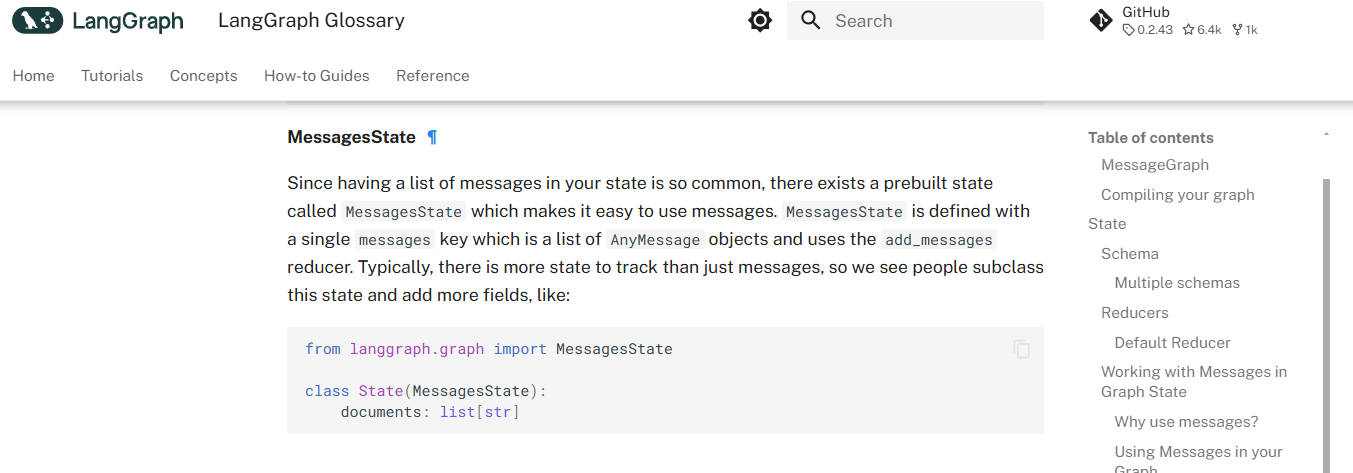

### Node

In [12]:
from langchain_core.messages import SystemMessage

# Define the function that calls the model
def call_model(state: MessagesState):
    system_prompt = (
        "You are a helpful assistant. "
        "Answer all questions to the best of your ability."
    )
    messages = [SystemMessage(content=system_prompt)] + state["messages"]
    response = model.invoke(messages)
    return {"messages": response}

### [StateGraph](https://langchain-ai.github.io/langgraph/reference/graphs/#langgraph.graph.state.StateGraph)

In [13]:
workflow = StateGraph(state_schema=MessagesState)

# Define the node and edge
workflow.add_node("model", call_model)
workflow.add_edge(START, "model")

### [MemorySaver](https://langchain-ai.github.io/langgraph/reference/checkpoints/#langgraph.checkpoint.memory.MemorySaver)
- 여기에서 설정하는 `thread_id`를 마치 채팅방 id라고 생각하면 됩니다.

In [14]:
# Add simple in-memory checkpointer
memory = MemorySaver()
app = workflow.compile(checkpointer=memory)

### display

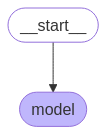

In [15]:
from IPython.display import Image

Image(app.get_graph().draw_mermaid_png())

### app.invoke

In [16]:
from langchain_core.messages import HumanMessage

ai_msg = app.invoke(
    {"messages": [HumanMessage(content="Translate to Korean: I love programming.")]},
    config={"configurable": {"thread_id": "1"}},
)

In [17]:
ai_msg.keys()

dict_keys(['messages'])

In [18]:
ai_msg['messages']

[HumanMessage(content='Translate to Korean: I love programming.', additional_kwargs={}, response_metadata={}, id='51edcaa8-4e45-4150-9cfe-ef6041290efc'),
 AIMessage(content='나는 프로그래밍을 사랑해요.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 35, 'total_tokens': 45, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_06737a9306', 'finish_reason': 'stop', 'logprobs': None}, id='run-7f1b2389-9bfb-4e87-8efc-f789fbffae02-0', usage_metadata={'input_tokens': 35, 'output_tokens': 10, 'total_tokens': 45, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]

In [19]:
ai_msg['messages'][-1].content

'나는 프로그래밍을 사랑해요.'

In [20]:
ai_msg = app.invoke(
    {"messages": [HumanMessage(content="What did I just ask you?")]},
    config={"configurable": {"thread_id": "1"}},
)

In [21]:
ai_msg['messages'][-1].content

'You asked me to translate the phrase "I love programming" into Korean.'

## [Trimming messages](https://python.langchain.com/docs/how_to/chatbots_memory/#trimming-messages)

### [trim_messages](https://python.langchain.com/api_reference/core/messages/langchain_core.messages.utils.trim_messages.html)
- strategy: Strategy for trimming.
  - “first”: Keep the first <= n_count tokens of the messages.
  - “last”: Keep the last <= n_count tokens of the messages.

In [22]:
from langchain_core.messages import trim_messages
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import START, MessagesState, StateGraph

# Define trimmer
# count each message as 1 "token" (token_counter=len) and keep only the last two messages
# -> 즉 max_tokens(=2)만큼의 이력만 기억함
trimmer = trim_messages(strategy="last", max_tokens=2, token_counter=len)

### Node

In [23]:
# Define the function that calls the model
def call_model(state: MessagesState):
    trimmed_messages = trimmer.invoke(state["messages"])
    system_prompt = (
        "You are a helpful assistant. "
        "Answer all questions to the best of your ability."
    )
    messages = [SystemMessage(content=system_prompt)] + trimmed_messages
    response = model.invoke(messages)
    return {"messages": response}

### StateGraph

In [24]:
workflow = StateGraph(state_schema=MessagesState)

# Define the node and edge
workflow.add_node("model", call_model)
workflow.add_edge(START, "model")

### MemorySaver

In [25]:
# Add simple in-memory checkpointer
memory = MemorySaver()
app = workflow.compile(checkpointer=memory)

### display

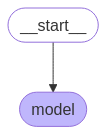

In [26]:
from IPython.display import Image

Image(app.get_graph().draw_mermaid_png())

### app.invoke

In [27]:
ai_msg = app.invoke(
    {
        "messages": [HumanMessage(content="Hey there! I'm Nemo.")]
    },
    config={"configurable": {"thread_id": "2"}},
)

ai_msg['messages'][-1].pretty_print()

================================== Ai Message ==================================

Hello, Nemo! How can I assist you today?


- 직전 대화 내용을 기억하고 있음

In [28]:
ai_msg = app.invoke(
    {
        "messages": [HumanMessage(content="What is my name?")]
    },
    config={"configurable": {"thread_id": "2"}},
)

ai_msg['messages'][-1].pretty_print()

================================== Ai Message ==================================

You just referred to yourself as "Nemo." How can I assist you today, Nemo?


In [29]:
ai_msg = app.invoke(
    {
        "messages": [HumanMessage(content="How are you today?")]
    },
    config={"configurable": {"thread_id": "2"}},
)

ai_msg['messages'][-1].pretty_print()

================================== Ai Message ==================================

I don't have feelings, but I'm here and ready to help you! How can I assist you today?


In [30]:
ai_msg = app.invoke(
    {
        "messages": [HumanMessage(content="What is LangChain?")]
    },
    config={"configurable": {"thread_id": "2"}},
)

ai_msg['messages'][-1].pretty_print()

================================== Ai Message ==================================

LangChain is an open-source framework designed for developing applications that leverage the capabilities of large language models (LLMs). It provides a modular approach to building applications with various components that can be easily integrated. Some of the key features and functionalities of LangChain include:

1. **Prompt Templates**: It allows developers to create and manage prompts for LLMs, enabling efficient and reusable interaction with the models.

2. **Chain of Thought**: LangChain supports the construction of chains where the output of one operation can be used as the input for another, facilitating complex workflows.

3. **Memory**: It offers capabilities for managing conversation history and contextual memory, allowing applications to maintain state over interactions.

4. **Integrations**: LangChain can interact with various data sources and APIs, making it easier to incorporate external i

- 최대 2개의 history를 기억하기 때문에, 아래와 같은 답을 함

In [31]:
ai_msg = app.invoke(
    {
        "messages": [HumanMessage(content="What is my name?")]
    },
    config={"configurable": {"thread_id": "2"}},
)

ai_msg['messages'][-1].pretty_print()

================================== Ai Message ==================================

I'm sorry, but I don't have access to your personal information, including your name. If you'd like, you can tell me your name!


## [Summary memory](https://python.langchain.com/docs/how_to/chatbots_memory/#summary-memory)

In [32]:
from langchain_core.messages import HumanMessage, RemoveMessage
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import START, MessagesState, StateGraph

### Node - Summary Function
- [RemoveMessage](https://python.langchain.com/api_reference/core/messages/langchain_core.messages.modifier.RemoveMessage.html)

In [33]:
# Define the function that calls the model
def call_model(state: MessagesState):
    system_prompt = (
        "You are a helpful assistant. "
        "Answer all questions to the best of your ability. "
        "The provided chat history includes a summary of the earlier conversation."
    )
    system_message = SystemMessage(content=system_prompt)

    ###################################################################
    # Summary Memory
    # -> History가 4개 이상일때, 작동
    ###################################################################
    message_history = state["messages"][:-1]  # exclude the most recent user input
    if len(message_history) >= 4:
        ###################################################################
        # Invoke the model to generate conversation summary
        ###################################################################
        summary_prompt = (
            "Distill the above chat messages into a single summary message. "
            "Include as many specific details as you can."
        )
        summary_message = model.invoke(
            message_history + [HumanMessage(content=summary_prompt)]
        )

        ###################################################################
        # Invoke the model to generate response
        ###################################################################
        # Re-add user message
        last_human_message = state["messages"][-1]
        human_message = HumanMessage(content=last_human_message.content)
        # Call the model with summary & response
        response = model.invoke([system_message, summary_message, human_message])

        ###################################################################
        # Delete messages that we no longer want to show up
        ###################################################################
        delete_messages = [RemoveMessage(id=m.id) for m in state["messages"]]
        message_updates = [summary_message, human_message, response] + delete_messages
    else:
        ###################################################################
        # Invoke the model to generate response
        ###################################################################
        message_updates = model.invoke([system_message] + state["messages"])

    return {"messages": message_updates}

### StateGraph

In [34]:
workflow = StateGraph(state_schema=MessagesState)

# Define the node and edge
workflow.add_node("model", call_model)
workflow.add_edge(START, "model")

### MemorySaver

In [35]:
# Add simple in-memory checkpointer
memory = MemorySaver()
app = workflow.compile(checkpointer=memory)

### display

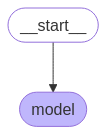

In [36]:
from IPython.display import Image

Image(app.get_graph().draw_mermaid_png())

### app.invoke

In [37]:
ai_msg = app.invoke(
    {
        "messages": [HumanMessage(content="안녕, 나는 홍길동이야.")]
    },
    config={"configurable": {"thread_id": "3"}},
)

ai_msg['messages'][-1].pretty_print()

================================== Ai Message ==================================

안녕하세요, 홍길동님! 어떻게 도와드릴까요?


In [38]:
ai_msg = app.invoke(
    {
        "messages": [HumanMessage(content="간단하게 AI에 대해서 설명해줘.")]
    },
    config={"configurable": {"thread_id": "3"}},
)

ai_msg['messages'][-1].pretty_print()

================================== Ai Message ==================================

AI(인공지능)는 컴퓨터 시스템이나 소프트웨어가 인간의 지능을 모방하여 학습, 문제 해결, 이해, 패턴 인식 등을 수행하는 기술입니다. AI는 주로 두 가지 범주로 나눌 수 있습니다:

1. **좁은 AI (Weak AI)**: 특정 작업에 특화된 AI로, 예를 들어 음성 인식, 이미지 인식, 자율주행차 등과 같은 분야에서 사용됩니다.

2. **일반 AI (Strong AI)**: 인간처럼 다양한 작업을 수행할 수 있는 AI를 의미하지만, 현재까지는 개발되지 않았습니다.

AI는 머신러닝, 딥러닝, 자연어 처리 등의 기술을 이용하여 데이터를 분석하고 예측하며, 점점 더 많은 분야에서 활용되고 있습니다. 예를 들어, 고객 서비스, 의료 진단, 금융 분석 등에서 사용되고 있습니다.


In [39]:
ai_msg = app.invoke(
    {
        "messages": [HumanMessage(content="한문장으로 LLM에 대해서 설명해줘.")]
    },
    config={"configurable": {"thread_id": "3"}},
)

ai_msg['messages'][-1].pretty_print()

================================== Ai Message ==================================

LLM(대형 언어 모델)은 방대한 양의 텍스트 데이터를 기반으로 인간과 유사한 방식으로 자연어를 이해하고 생성하는 인공지능 모델입니다.


In [40]:
ai_msg = app.invoke(
    {
        "messages": [HumanMessage(content="대한민국의 수도는?")]
    },
    config={"configurable": {"thread_id": "3"}},
)

ai_msg['messages'][-1].pretty_print()

================================== Ai Message ==================================

대한민국의 수도는 서울입니다.


In [41]:
ai_msg = app.invoke(
    {
        "messages": [HumanMessage(content="혹시 내 이름이 뭔지 알아?")]
    },
    config={"configurable": {"thread_id": "3"}},
)

ai_msg['messages'][-1].pretty_print()

================================== Ai Message ==================================

죄송하지만, 당신의 이름을 알 수 있는 정보가 없습니다. 필요하시다면 이름을 말씀해 주시면 그에 맞춰서 대화할 수 있습니다!


# [Add message history](https://python.langchain.com/docs/how_to/message_history/#example-message-inputs)

## [message inputs](https://python.langchain.com/docs/how_to/message_history/#example-message-inputs)

In [42]:
from langchain_core.messages import HumanMessage
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import START, MessagesState, StateGraph

### Define the function

In [43]:
# Define the function that calls the model
def call_model(state: MessagesState):
    response = model.invoke(state["messages"])
    # Update message history with response:
    return {"messages": response}

### StateGraph

In [44]:
# Define a new graph
workflow = StateGraph(state_schema=MessagesState)

# Define the (single) node in the graph
workflow.add_edge(START, "model")
workflow.add_node("model", call_model)

### MemorySaver

In [45]:
# Add memory
memory = MemorySaver()
app = workflow.compile(checkpointer=memory)

### display

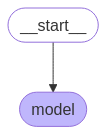

In [46]:
from IPython.display import Image

Image(app.get_graph().draw_mermaid_png())

### app.invoke

In [47]:
config = {"configurable": {"thread_id": "abc123"}}

In [48]:
query = "Hi! I'm Bob."

input_messages = [HumanMessage(query)]
output = app.invoke({"messages": input_messages}, config)
output["messages"][-1].pretty_print()  # output contains all messages in state

================================== Ai Message ==================================

Hi Bob! How can I assist you today?


In [49]:
query = "What's my name?"

input_messages = [HumanMessage(query)]
output = app.invoke({"messages": input_messages}, config)
output["messages"][-1].pretty_print()

================================== Ai Message ==================================

Your name is Bob. How can I help you today?


- `thread_id`를 다른 값으로 적용하면, 기억을 하지 못함

In [50]:
query = "What's my name?"
config = {"configurable": {"thread_id": "abc234"}}

input_messages = [HumanMessage(query)]
output = app.invoke({"messages": input_messages}, config)
output["messages"][-1].pretty_print()

================================== Ai Message ==================================

I don't have access to personal data unless you've shared it with me in this conversation. Therefore, I don't know your name. If you'd like to tell me, feel free!


## [dictionary inputs](https://python.langchain.com/docs/how_to/message_history/#example-dictionary-inputs)

### State

In [51]:
from typing import Sequence

from langchain_core.messages import BaseMessage
from langgraph.graph.message import add_messages
from typing_extensions import Annotated, TypedDict


class State(TypedDict):
    messages: Annotated[Sequence[BaseMessage], add_messages]
    language: str

### Node
- [ChatPromptTemplate](https://python.langchain.com/api_reference/core/prompts/langchain_core.prompts.chat.ChatPromptTemplate.html)

In [52]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

prompt = ChatPromptTemplate.from_messages(
    [
        ("system", "Answer in {language}."),
        MessagesPlaceholder(variable_name="messages"),
    ]
)

runnable = prompt | model

In [53]:
prompt.input_variables

['language', 'messages']

In [54]:
def call_model(state: State):
    response = runnable.invoke(state)
    # Update message history with response:
    return {"messages": [response]}

### StateGraph

In [55]:
workflow = StateGraph(state_schema=State)
workflow.add_edge(START, "model")
workflow.add_node("model", call_model)

### MemorySaver

In [56]:
memory = MemorySaver()
app = workflow.compile(checkpointer=memory)

### display

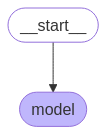

In [57]:
from IPython.display import Image

Image(app.get_graph().draw_mermaid_png())

### app.invoke

In [58]:
config = {"configurable": {"thread_id": "abc345"}}

input_dict = {
    "messages": [HumanMessage("Hi, I'm Bob.")],
    "language": "Spanish",
}
output = app.invoke(input_dict, config)
output["messages"][-1].pretty_print()

================================== Ai Message ==================================

¡Hola, Bob! ¿En qué puedo ayudarte hoy?


In [59]:
config = {"configurable": {"thread_id": "abc345"}}

input_dict = {
    "messages": [HumanMessage("Hi, I'm Bob.")],
    "language": "Korean",
}
output = app.invoke(input_dict, config)
output["messages"][-1].pretty_print()

================================== Ai Message ==================================

안녕하세요, Bob! 어떻게 도와드릴까요?


## [managing message history](https://python.langchain.com/docs/how_to/message_history/#managing-message-history)

In [60]:
state = app.get_state(config).values

for message in state["messages"]:
    message.pretty_print()

================================ Human Message =================================

Hi, I'm Bob.
================================== Ai Message ==================================

¡Hola, Bob! ¿En qué puedo ayudarte hoy?
================================ Human Message =================================

Hi, I'm Bob.
================================== Ai Message ==================================

안녕하세요, Bob! 어떻게 도와드릴까요?


In [61]:
state = app.get_state(config).values

print(state["language"])

Korean


### update_state

In [62]:
from langchain_core.messages import HumanMessage

_ = app.update_state(config, {"messages": [HumanMessage("Test")]})

In [63]:
state = app.get_state(config).values

for message in state["messages"]:
    message.pretty_print()

================================ Human Message =================================

Hi, I'm Bob.
================================== Ai Message ==================================

¡Hola, Bob! ¿En qué puedo ayudarte hoy?
================================ Human Message =================================

Hi, I'm Bob.
================================== Ai Message ==================================

안녕하세요, Bob! 어떻게 도와드릴까요?
================================ Human Message =================================

Test
